In [30]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [31]:
def sigmoid(x):
    z = 1/(1 + np.exp(-x))
    return z

In [3]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()


K = len(np.unique(y_train)) # Classes
N_tr = x_train.shape[0]
N_te = x_test.shape[0]
Din = 3072 # CIFAR10
# Din = 784 # MINIST

# Normalize pixel values
x_train, x_test = x_train / 255.0, x_test / 255.0
mean_image = np.mean(x_train, axis=0)
x_train = x_train - mean_image
x_test = x_test - mean_image

y_train = tf.keras.utils.to_categorical(y_train, num_classes=K)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=K)

x_train = np.reshape(x_train,(N_tr,Din))
print("x_train: ", x_train.shape)
x_test = np.reshape(x_test,(N_te,Din))
x_train = x_train.astype("float32")
x_test = x_test.astype("float32")

std=1e-5
w1 = std*np.random.randn(Din, K)
b1 = np.zeros(K)
print("w1:", w1.shape)
print("y_train:", y_train.shape)
print("b1:", b1.shape)
batch_size = N_tr



x_train:  (50000, 3072)
w1: (3072, 10)
y_train: (50000, 10)
b1: (10,)


In [4]:
epochs = 50
lr = 0.1
lr_decay=0.0001
reg = []
loss_history = []
train_acc_history = []
val_acc_history = []
seed = 0
rng = np.random.default_rng(seed=seed)
for t in range(epochs):
    indices = np.arange(N_tr)
    rng.shuffle(indices)
    # Forward pass
    h = np.matmul(x_train,w1)+b1
    y_pred  = sigmoid(h)
    #print(y_pred[0])
    loss = (1/N_tr)*np.sum(np.square(y_train-y_pred))

    loss_history.append(loss)
    reg.append(t)

    #print(y_pred[0])
    print('epoch',t+1)
    print('loss',loss)

    # Backw propogation
    lr = lr * (1 / (1 + lr_decay * t))
    w1 = w1 - lr*(1/N_tr)*np.matmul(np.transpose(x_train),(y_pred-y_train))
    b1 = b1 - lr*(1/N_tr)*np.sum(y_pred-y_train,axis = 0)


    y_out = np.zeros_like(y_train)
    y_out[np.arange(len(y_train)), y_pred.argmax(1)] = 1
    
    comp = np.all(y_out==y_train,axis = 1)
    
    accuracy = np.sum(comp)/N_tr
    train_acc_history.append(accuracy)
    #print(np.sum(comp))
    print('accuracy : ',accuracy*100)
    print('\n')
    


epoch 1
loss 2.500004707537761
accuracy :  8.926


epoch 2
loss 2.3854618338627995
accuracy :  24.396


epoch 3
loss 2.297334379608739


KeyboardInterrupt: 

Printing accuracies and displaying w as images

final loss :  1.0099826027651748
final accuracy :  38.379999999999995


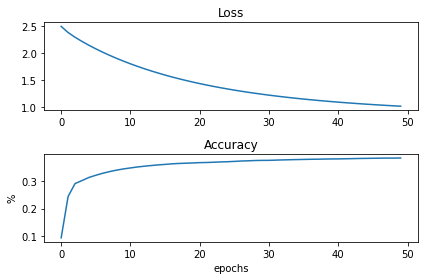

In [9]:
print('final loss : ',loss)
print('final accuracy : ',accuracy*100)

fig,ax = plt.subplots(2,1)
ax[0].plot(reg,loss_history)
ax[1].plot(reg,train_acc_history)
ax[0].set_title('Loss')
ax[1].set_title('Accuracy')
ax[1].set_xlabel('epochs')
ax[1].set_ylabel('%')
fig.tight_layout()
plt.show()

Display weights as images

testing the accuracy

In [10]:
#Testing
h_testing = np.matmul(x_test,w1)+b1
y_pred_test  = sigmoid(h_testing)
loss_test = (1/N_te)*np.sum(np.square(y_test-y_pred_test))
y_out_test = np.zeros_like(y_test)
y_out_test[np.arange(len(y_test)), y_pred_test.argmax(1)] = 1
    
comp_test = np.all(y_out_test==y_test,axis = 1)
    
accuracy = np.sum(comp_test)/N_te
print("Test data loss :",loss_test)
print("Test data accuracy :",accuracy*100)

Test data loss : 1.003417438865267
Test data accuracy : 38.269999999999996


## Task 2

In [32]:
def sigmoid(x):
    z = 1/(1 + np.exp(-x))
    return z
    
def sigmoid_derive(x):
    return x*(1-x)

In [33]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

K = len(np.unique(y_train)) # Classes
N_tr = x_train.shape[0]
N_te = x_test.shape[0]
Din = 3072 # CIFAR10
# Din = 784 # MINIST

# Normalize pixel values
#x_train, x_test = x_train / 255.0, x_test / 255.0
mean_image = np.mean(x_train, axis=0)
x_train = x_train - mean_image
x_test = x_test - mean_image

y_train = tf.keras.utils.to_categorical(y_train, num_classes=K)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=K)

x_train = np.reshape(x_train,(N_tr,Din))
print("x_train: ", x_train.shape)
x_test = np.reshape(x_test,(N_te,Din))
x_train = x_train.astype("float32")
x_test = x_test.astype("float32")



x_train:  (50000, 3072)


In [34]:
std=1e-5
Din = 3072
HL1_nodes  =200
K = 10

w1 = std*np.random.randn(Din, HL1_nodes)
b1 = np.zeros(HL1_nodes)

w2 = std*np.random.randn(HL1_nodes, K)
b2 = np.zeros(K)
print("w1:", w1.shape)
print("b1:", b1.shape)
print("w2:", w2.shape)
print("b2:", b2.shape)

x = np.concatenate((np.ones((x_train.shape[0],1)),x_train),axis = 1)
x_test_rs = np.concatenate((np.ones((x_test.shape[0],1)),x_test),axis = 1)
y = y_train

# Creating a single weight matrix
w1 = np.concatenate((b1.reshape(1,HL1_nodes),w1),axis = 0)
w2 = np.concatenate((b2.reshape(1,K),w2),axis = 0)

batchsize = N_tr

w1: (3072, 200)
b1: (200,)
w2: (200, 10)
b2: (10,)


In [35]:
iterations = 300 #Epochs
lr = 1.4e-2
lr_decay = 0.999
reg = 5e-6
loss_history = []
val_loss_history = []
train_acc_history = []
val_acc_history = []

for t in range(iterations):

    h = sigmoid(x.dot(w1))
    L2_input = np.concatenate((np.ones((h.shape[0],1)),h),axis = 1)
    y_pred = L2_input.dot(w2)
    loss = (1.0/(2*batchsize))*(np.square(y_pred-y).sum()+reg*(np.sum(w2*w2)+np.sum(w1*w1)))
    loss_history.append(loss)

    # calculation accuracy of the test set
    pred = np.argmax(y_pred,axis = 1)
    train = np.argmax(y,axis = 1)
    valid = [pred == train]
    accuracy = 100*np.sum(valid)/len(train)
    train_acc_history.append(accuracy)

    # forward propagation for the test set
    h_test = sigmoid(x_test_rs.dot(w1))
    L2_in_test = np.concatenate((np.ones((h_test.shape[0],1)),h_test),axis = 1)
    y_pred_test = L2_in_test.dot(w2)
    loss_test = (1.0/(2*N_te))*(np.square(y_pred_test-y_test).sum()+reg*(np.sum(w2*w2)+np.sum(w1*w1)))
    val_loss_history.append(loss_test)

    # accuracy of the test set
    pred_test = np.argmax(y_pred_test,axis = 1)
    true_test = np.argmax(y_test,axis = 1)
    valid_test = [pred_test == true_test]
    accuracy_test = 100*np.sum(valid_test)/len(true_test)
    val_acc_history.append(accuracy_test)

    if t%10 == 0:
        print("Epoch: ",t+1)
        print("Loss: ",loss)
        print("Accuracy: ",accuracy)
        print("Loss Test : ",loss_test)
        print("Accuracy Test : ",accuracy_test)
    
    # Back propagation
    dy_pred = (1.0/batchsize)*(y_pred-y)
    dw2 = L2_input.T.dot(dy_pred)+(1/batchsize)*reg*w2
    db2 = dy_pred.sum(axis = 0)
    dh = dy_pred.dot(w2[1:,].T)
    dw1 = x.T.dot(dh*h*(1-h))+(1/batchsize)*reg*w1
    db1 = (dh*h*(1-h)).sum(axis = 0)

    w1 -= lr*dw1
    w2 -= lr*dw2
    lr *= lr_decay

    #print("Epoch:",t," Training Loss:",loss, " Training Accuracy:",accuracy," Test Loss:",loss_test," Test Accuracy:",accuracy_test)

Epoch:  1
Loss:  0.5000013108257401
Accuracy:  10.0
Loss Test :  0.5000013184854369
Accuracy Test :  10.0
Epoch:  11
Loss:  0.44016034683862965
Accuracy:  16.016
Loss Test :  0.4399890058899274
Accuracy Test :  15.96
Epoch:  21
Loss:  0.4262174558092867
Accuracy:  23.032
Loss Test :  0.42610002122210766
Accuracy Test :  22.92
Epoch:  31
Loss:  0.4233841497058475
Accuracy:  26.56
Loss Test :  0.422861756081671
Accuracy Test :  26.46
Epoch:  41
Loss:  0.41598639222384587
Accuracy:  30.454
Loss Test :  0.41565796139497424
Accuracy Test :  30.23
Epoch:  51
Loss:  0.41272087227130994
Accuracy:  32.482
Loss Test :  0.412483323420686
Accuracy Test :  32.76
Epoch:  61
Loss:  0.40962348848226293
Accuracy:  33.788
Loss Test :  0.4095025675482923
Accuracy Test :  34.09
Epoch:  71
Loss:  0.4074771635426038
Accuracy:  33.944
Loss Test :  0.4078252505807846
Accuracy Test :  33.59
Epoch:  81
Loss:  0.40361454141146047
Accuracy:  35.678
Loss Test :  0.4040852743065709
Accuracy Test :  35.4
Epoch:  91


In [36]:
print('Train data loss : ',loss)
print('Train data accuracy : ',accuracy)

print("Test data loss :",loss_test)
print("Test data accuracy :",accuracy_test)

Train data loss :  0.376620222889511
Train data accuracy :  44.218
Test data loss : 0.3818989285266433
Test data accuracy : 42.41


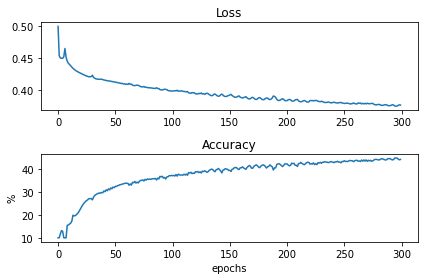

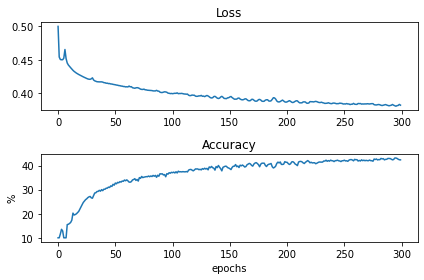

In [37]:
# Plots of traning set
fig,ax = plt.subplots(2,1)
t_array = np.arange(0,iterations)
ax[0].plot(t_array,loss_history)
ax[1].plot(t_array,train_acc_history)
ax[0].set_title('Loss')
ax[1].set_title('Accuracy')
ax[1].set_xlabel('epochs')
ax[1].set_ylabel('%')
fig.tight_layout()
plt.show()

# Plots of test set
fig,ax = plt.subplots(2,1)
t_array = np.arange(0,iterations)
ax[0].plot(t_array,val_loss_history)
ax[1].plot(t_array,val_acc_history)
ax[0].set_title('Loss')
ax[1].set_title('Accuracy')
ax[1].set_xlabel('epochs')
ax[1].set_ylabel('%')
fig.tight_layout()
plt.show()

## Task 3 - Stochastic Gradient Decend

In [38]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()


K = len(np.unique(y_train)) # Classes
N_tr = x_train.shape[0]
N_te = x_test.shape[0]
Din = 3072 # CIFAR10
# Din = 784 # MINIST

# Normalize pixel values
#x_train, x_test = x_train / 255.0, x_test / 255.0
mean_image = np.mean(x_train, axis=0)
x_train = x_train - mean_image
x_test = x_test - mean_image

y_train = tf.keras.utils.to_categorical(y_train, num_classes=K)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=K)

x_train = np.reshape(x_train,(N_tr,Din))
print("x_train: ", x_train.shape)
x_test = np.reshape(x_test,(N_te,Din))
x_train = x_train.astype("float32")
x_test = x_test.astype("float32")

x_train:  (50000, 3072)


In [39]:
std=1e-5
Din = 3072
HL1_nodes  =200
K = 10

w1 = std*np.random.randn(Din, HL1_nodes)
b1 = np.zeros(HL1_nodes)

w2 = std*np.random.randn(HL1_nodes, K)
b2 = np.zeros(K)
print("w1:", w1.shape)
print("b1:", b1.shape)
print("w2:", w2.shape)
print("b2:", b2.shape)

x_train_rs = np.concatenate((np.ones((x_train.shape[0],1)),x_train),axis = 1)
x_test_rs = np.concatenate((np.ones((x_test.shape[0],1)),x_test),axis = 1)

# Creating a single weight matrix
w1 = np.concatenate((b1.reshape(1,HL1_nodes),w1),axis = 0)
w2 = np.concatenate((b2.reshape(1,K),w2),axis = 0)

w1: (3072, 200)
b1: (200,)
w2: (200, 10)
b2: (10,)


In [40]:
iterations = 300 #Epochs
lr = 1.4e-2
lr_decay = 0.999
reg = 5e-6
loss_history = []
val_loss_history = []
train_acc_history = []
val_acc_history = []

batchsize = 500
for t in range(iterations):

    batch_indices = np.random.choice(N_tr,batchsize)
    x = x_train_rs[batch_indices]
    y = y_train[batch_indices]

    h = sigmoid(x.dot(w1))
    L2_input = np.concatenate((np.ones((h.shape[0],1)),h),axis = 1)
    y_pred = L2_input.dot(w2)

    # Forward propagation for the whole traning set to calculate loss
    h_train = sigmoid(x_train_rs.dot(w1))
    L2_in_train = np.concatenate((np.ones((h_train.shape[0],1)),h_train),axis = 1)
    y_pred_train = L2_in_train.dot(w2)
    loss_train = (1.0/(2*N_tr))*(np.square(y_pred_train-y_train).sum()+reg*(np.sum(w2*w2)+np.sum(w1*w1)))
    loss_history.append(loss_train)

    # forward propagation for the test set
    h_test = sigmoid(x_test_rs.dot(w1))
    L2_in_test = np.concatenate((np.ones((h_test.shape[0],1)),h_test),axis = 1)
    y_pred_test = L2_in_test.dot(w2)
    loss_test = (1.0/(2*N_te))*(np.square(y_pred_test-y_test).sum()+reg*(np.sum(w2*w2)+np.sum(w1*w1)))
    val_loss_history.append(loss_test)

    # accuracy of the training set
    pred_train = np.argmax(y_pred_train,axis = 1)
    true_train = np.argmax(y_train,axis = 1)
    valid_train = [pred_train == true_train]
    accuracy_train = 100*np.sum(valid_train)/len(true_train)
    train_acc_history.append(accuracy_train)

    # accuracy of the test set
    pred_test = np.argmax(y_pred_test,axis = 1)
    true_test = np.argmax(y_test,axis = 1)
    valid_test = [pred_test == true_test]
    accuracy_test = 100*np.sum(valid_test)/len(true_test)
    val_acc_history.append(accuracy_test)

    #print("Epoch:",t," Training Loss:",loss_train, " Training Accuracy:",accuracy_train," Test Loss:",loss_test," Test Accuracy:",accuracy_test)
    
    if (t+1)%10 == 0 or t==0:
        print("Epoch: ",t+1)
        print("Loss: ",loss_train)
        print("Accuracy: ",accuracy_train)
        print("Test Loss: ",loss_test)
        print("Test Accuracy: ",accuracy_test)
        print('\n')
    
    # Back propagation
    dy_pred = (1.0/batchsize)*(y_pred-y)
    dw2 = L2_input.T.dot(dy_pred)+(1/batchsize)*reg*w2
    db2 = dy_pred.sum(axis = 0)
    dh = dy_pred.dot(w2[1:,].T)
    dw1 = x.T.dot(dh*h*(1-h))+(1/batchsize)*reg*w1
    db1 = (dh*h*(1-h)).sum(axis = 0)

    w1 -= lr*dw1
    w2 -= lr*dw2
    lr *= lr_decay

Epoch:  1
Loss:  0.5000482879241103
Accuracy:  7.456
Test Loss:  0.50004830962006
Test Accuracy:  7.98


Epoch:  10
Loss:  0.44273941099174363
Accuracy:  15.544
Test Loss:  0.44254750212541716
Test Accuracy:  15.68


Epoch:  20
Loss:  0.429970614139278
Accuracy:  18.874
Test Loss:  0.4300701266279193
Test Accuracy:  18.97


Epoch:  30
Loss:  0.4215871251511539
Accuracy:  27.132
Test Loss:  0.4211838684314913
Test Accuracy:  27.31


Epoch:  40
Loss:  0.41608707181675253
Accuracy:  31.014
Test Loss:  0.4159802138748947
Test Accuracy:  31.14


Epoch:  50
Loss:  0.4145407006646151
Accuracy:  29.954
Test Loss:  0.4144257631199712
Test Accuracy:  30.12


Epoch:  60
Loss:  0.41289129170214856
Accuracy:  32.566
Test Loss:  0.4132219287585188
Test Accuracy:  32.1


Epoch:  70
Loss:  0.41024404894423167
Accuracy:  31.87
Test Loss:  0.41051213893008537
Test Accuracy:  31.34


Epoch:  80
Loss:  0.4064802812605275
Accuracy:  34.854
Test Loss:  0.40654758238236777
Test Accuracy:  34.91


Epoch:  90


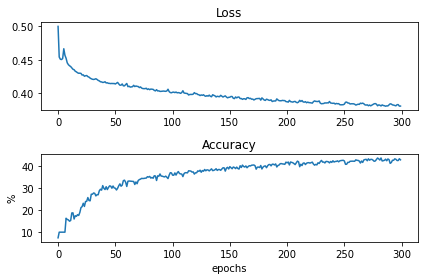

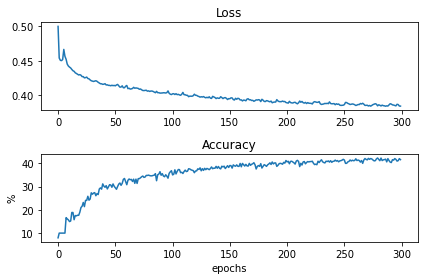

In [41]:
# Plots of traning set
fig,ax = plt.subplots(2,1)
t_array = np.arange(0,iterations)
ax[0].plot(t_array,loss_history)
ax[1].plot(t_array,train_acc_history)
ax[0].set_title('Loss')
ax[1].set_title('Accuracy')
ax[1].set_xlabel('epochs')
ax[1].set_ylabel('%')
fig.tight_layout()
plt.show()

# Plots of test set
fig,ax = plt.subplots(2,1)
t_array = np.arange(0,iterations)
ax[0].plot(t_array,val_loss_history)
ax[1].plot(t_array,val_acc_history)
ax[0].set_title('Loss')
ax[1].set_title('Accuracy')
ax[1].set_xlabel('epochs')
ax[1].set_ylabel('%')
fig.tight_layout()
plt.show()

## Task 4

In [23]:
from __future__ import print_function
import keras
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.models import load_model
import os

batch_size = 50
num_classes = 10
epochs = 30

# Loads the CIFAR dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Display our data shape/dimensions
print('x_train shape:', x_train.shape)
print('y_train shape:', y_train.shape)
print(y_train[0])
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# Format our training data by Normalizing and changing data type
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

# Now we one hot encode outputs
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model = Sequential()
# Padding = 'same'  results in padding the input such that
# the output has the same length as the original input
model.add(Conv2D(32, (3, 3), padding='same',input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

# initiate RMSprop optimizer and configure parameters
opt =keras.optimizers.SGD(learning_rate=0.001, momentum=0.01, nesterov=False, name="SGD")
#create our model
model.compile(loss = 'categorical_crossentropy',optimizer = opt,metrics = ['accuracy'])

print(model.summary())

x_train shape: (50000, 32, 32, 3)
y_train shape: (50000, 1)
[6]
50000 train samples
10000 test samples
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
activation (Activation)      (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
activation_1 (Activation)    (None, 14, 14, 64)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0         
___________________

In [24]:
history = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          validation_data=(x_test, y_test),
          shuffle=True)

# Evaluate the performance of our trained model
scores = model.evaluate(x_test, y_test, verbose=1)


Epoch 1/30
1000/1000 [==============================] - 39s 39ms/step - loss: 2.2998 - accuracy: 0.1201 - val_loss: 2.2952 - val_accuracy: 0.1512
Epoch 2/30
1000/1000 [==============================] - 42s 42ms/step - loss: 2.2905 - accuracy: 0.1621 - val_loss: 2.2851 - val_accuracy: 0.1842
Epoch 3/30
1000/1000 [==============================] - 41s 41ms/step - loss: 2.2788 - accuracy: 0.1842 - val_loss: 2.2712 - val_accuracy: 0.1987
Epoch 4/30
1000/1000 [==============================] - 41s 41ms/step - loss: 2.2602 - accuracy: 0.1923 - val_loss: 2.2465 - val_accuracy: 0.1943
Epoch 5/30
1000/1000 [==============================] - 41s 41ms/step - loss: 2.2266 - accuracy: 0.1995 - val_loss: 2.2018 - val_accuracy: 0.2071
Epoch 6/30
1000/1000 [==============================] - 41s 41ms/step - loss: 2.1677 - accuracy: 0.2226 - val_loss: 2.1293 - val_accuracy: 0.2454
Epoch 7/30
1000/1000 [==============================] - 42s 42ms/step - loss: 2.0893 - accuracy: 0.2516 - val_loss: 2.0506 -

In [25]:
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

Test loss: 1.5142608880996704
Test accuracy: 0.45399999618530273
